In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [2]:
import keras

In [3]:
data = pd.read_csv('./Tweets.csv')############讀資料近來#########ˇ

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data = data[['airline_sentiment', 'text']]############取位置#########ˇ

In [6]:
data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [7]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [8]:
data_p = data[data.airline_sentiment == 'positive']

In [9]:
data_n = data[data.airline_sentiment == 'negative']

In [10]:
data_n = data_n.iloc[:len(data_p)]

In [11]:
len(data_n), len(data_p)

(2363, 2363)

In [15]:
data = pd.concat([data_n, data_p])

In [17]:
data['review'] = (data.airline_sentiment == 'positive').astype('int')

In [18]:
data

,airline_sentiment,text,review
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
15,negative,@VirginAmerica SFO-PDX schedule is still MIA.,0
17,negative,@VirginAmerica I flew from NYC to SFO last we...,0
...,...,...,...
14623,positive,@AmericanAir Love the new planes for the JFK-L...,1
14625,positive,@AmericanAir Flight 236 was great. Fantastic c...,1
14628,positive,Thank you. “@AmericanAir: @jlhalldc Customer R...,1
14630,positive,@AmericanAir Thanks! He is.,1


In [19]:
data = data.sample(len(data))

In [21]:
data

,airline_sentiment,text,review
3306,negative,@united @bwood we'd prefer everyone hear our c...,0
8802,positive,@JetBlue And we are glad to see what is going ...,1
8394,positive,@JetBlue definitely!,1
895,negative,@united well someone should tell that to the e...,0
7749,positive,"@JetBlue Thanks for the instant reply, and for...",1
...,...,...,...
3252,negative,@united how can you never got a flight from au...,0
8702,positive,@JetBlue Finally taking off! LAS-FLL-SJU #letsgo,1
12337,positive,@AmericanAir I wish I could remember all of th...,1
13965,positive,@AmericanAir thanks to Marie for reFlight Book...,1


In [22]:
del data['airline_sentiment']

############將好跟壞 替換成0跟1 並且將數據參半#########ˇ

tf.keras.layers.Embedding  把文本向量化

In [23]:
import re

將符號去除 並且大寫變成小寫

In [24]:
token = re.compile('[A-Za-z]+|[!?,.()]')

In [25]:
def reg_text(text):
    new_text = token.findall(text)
    new_text = [word.lower() for word in new_text]
    return new_text

In [33]:
data

,text,review
3306,"[united, bwood, we, d, prefer, everyone, hear,...",0
8802,"[jetblue, and, we, are, glad, to, see, what, i...",1
8394,"[jetblue, definitely, !]",1
895,"[united, well, someone, should, tell, that, to...",0
7749,"[jetblue, thanks, for, the, instant, reply, ,,...",1
...,...,...
3252,"[united, how, can, you, never, got, a, flight,...",0
8702,"[jetblue, finally, taking, off, !, las, fll, s...",1
12337,"[americanair, i, wish, i, could, remember, all...",1
13965,"[americanair, thanks, to, marie, for, reflight...",1


In [30]:
data['text'] = data.text.apply(reg_text)

TypeError: expected string or bytes-like object

##把重複的名詞去掉並且給定編號

In [51]:
word_set = set()

In [54]:
word_set

{'daysofunitedfailures',
 'reward',
 'contents',
 'coupons',
 'kevin',
 'convenient',
 'batting',
 'rental',
 'dallas',
 'kid',
 'keepit',
 'process',
 'jetblue',
 'passion',
 'impending',
 'galley',
 'reading',
 'teamspirit',
 'challenging',
 'herself',
 'tmrw',
 'include',
 'rudest',
 'zo',
 'sing',
 'teams',
 'likely',
 'tone',
 'reviewed',
 'share',
 'contractors',
 'might',
 'kci',
 'in',
 'strand',
 'agree',
 'global',
 'i',
 'msy',
 'live',
 'reported',
 'place',
 'parizad',
 'ordeal',
 'ots',
 'digital',
 'retrain',
 'ppva',
 'cih',
 'dedication',
 'grumpykim',
 'bethonors',
 'vegetarian',
 'finest',
 's',
 'upset',
 'damper',
 'slight',
 'yiwlhqhzgp',
 'jdvk',
 'sea',
 'standard',
 'ph',
 'djjjn',
 'lyoocx',
 'vftuyjh',
 'cleaning',
 'moon',
 'design',
 'volleyball',
 'egregious',
 'discuss',
 'engaging',
 'served',
 'pqm',
 'spent',
 'nue',
 'reissued',
 'volunteer',
 'terriblecustomerservice',
 'acosta',
 'ryxbplgmnk',
 'worstservice',
 'misfortune',
 'contain',
 'paxex',
 '

In [53]:
word_set = set()
for text in data.text:
    for word in text:
        word_set.add(word) 

In [38]:
max_word = len(word_set) + 1
max_word

7101

In [55]:
word_list = list(word_set)

In [56]:
word_list.index(word)

3955

In [57]:
word

'!'

In [43]:
word_index =  dict((word, word_list.index(word) + 1) for word in word_list)

In [44]:
word_index

{'daysofunitedfailures': 1,
 'reward': 2,
 'contents': 3,
 'coupons': 4,
 'kevin': 5,
 'convenient': 6,
 'batting': 7,
 'rental': 8,
 'dallas': 9,
 'kid': 10,
 'keepit': 11,
 'process': 12,
 'jetblue': 13,
 'passion': 14,
 'impending': 15,
 'galley': 16,
 'reading': 17,
 'teamspirit': 18,
 'challenging': 19,
 'herself': 20,
 'tmrw': 21,
 'include': 22,
 'rudest': 23,
 'zo': 24,
 'sing': 25,
 'teams': 26,
 'likely': 27,
 'tone': 28,
 'reviewed': 29,
 'share': 30,
 'contractors': 31,
 'might': 32,
 'kci': 33,
 'in': 34,
 'strand': 35,
 'agree': 36,
 'global': 37,
 'i': 38,
 'msy': 39,
 'live': 40,
 'reported': 41,
 'place': 42,
 'parizad': 43,
 'ordeal': 44,
 'ots': 45,
 'digital': 46,
 'retrain': 47,
 'ppva': 48,
 'cih': 49,
 'dedication': 50,
 'grumpykim': 51,
 'bethonors': 52,
 'vegetarian': 53,
 'finest': 54,
 's': 55,
 'upset': 56,
 'damper': 57,
 'slight': 58,
 'yiwlhqhzgp': 59,
 'jdvk': 60,
 'sea': 61,
 'standard': 62,
 'ph': 63,
 'djjjn': 64,
 'lyoocx': 65,
 'vftuyjh': 66,
 'clea

In [45]:
data_ok = data.text.apply(lambda x: [word_index.get(word, 0) for word in x])

In [46]:
data

,text,review
3306,"[united, bwood, we, d, prefer, everyone, hear,...",0
8802,"[jetblue, and, we, are, glad, to, see, what, i...",1
8394,"[jetblue, definitely, !]",1
895,"[united, well, someone, should, tell, that, to...",0
7749,"[jetblue, thanks, for, the, instant, reply, ,,...",1
...,...,...
3252,"[united, how, can, you, never, got, a, flight,...",0
8702,"[jetblue, finally, taking, off, !, las, fll, s...",1
12337,"[americanair, i, wish, i, could, remember, all...",1
13965,"[americanair, thanks, to, marie, for, reflight...",1


In [50]:
data_ok

3306     [3929, 3815, 4335, 5757, 3498, 4757, 5861, 650...
8802     [13, 4547, 4335, 6058, 312, 4726, 6751, 3750, ...
8394                                      [13, 4763, 3956]
895      [3929, 2029, 5002, 4196, 501, 3305, 4726, 3445...
7749     [13, 5918, 1585, 3445, 2934, 2540, 1805, 4547,...
                               ...                        
3252     [3929, 3638, 338, 2608, 3489, 4265, 3045, 413,...
8702     [13, 5845, 1280, 4678, 3956, 4786, 1063, 162, ...
12337    [6261, 38, 7060, 38, 4508, 6754, 2873, 4065, 2...
13965    [6261, 5918, 4726, 4968, 1585, 4978, 4913, 457...
7141     [13, 6502, 164, 55, 4616, 7062, 3179, 6364, 54...
Name: text, Length: 4726, dtype: object

In [58]:
maxlen = max(len(x) for x in data_ok)

In [67]:
max_word

7101

In [60]:
data_ok = keras.preprocessing.sequence.pad_sequences(data_ok.values, maxlen=maxlen)

In [61]:
data_ok[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 3929, 3815, 4335, 5757, 3498,
       4757, 5861, 6502, 1461, 2531, 7007, 2880])

#############將data補成長度一樣!@@@

In [62]:
model = keras.Sequential()

Embeding : 把文本映射為一个向量

In [63]:
model.add(layers.Embedding(max_word, 50, input_length=maxlen))

In [64]:
model.add(layers.LSTM(64))

In [65]:
model.add(layers.Dense(1, activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 50)            355050    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 384,555
Trainable params: 384,555
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
)

In [45]:
history = model.fit(data_ok, data.review.values, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


UnknownError: Graph execution error:

Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential/lstm/PartitionedCall]] [Op:__inference_train_function_3152]

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

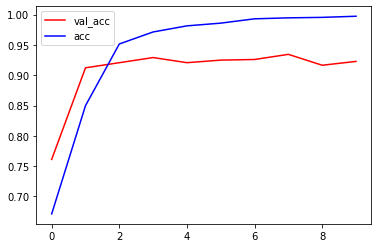

In [117]:
plt.plot(history.epoch, history.history.get('val_acc'), c='r', label='val_acc')
plt.plot(history.epoch, history.history.get('acc'), c='b', label='acc')
plt.legend()

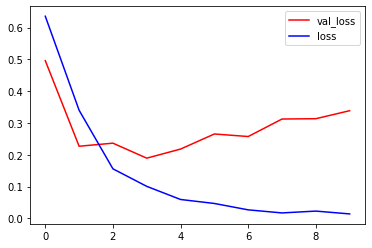

In [118]:
plt.plot(history.epoch, history.history.get('val_loss'), c='r', label='val_loss')
plt.plot(history.epoch, history.history.get('loss'), c='b', label='loss')
plt.legend()

使用dropout 抑制overfitting

In [124]:
def train_model():
    model = keras.Sequential()
    model.add(layers.Embedding(max_word, 16, input_length=maxlen))
    model.add(layers.LSTM(64,
                         dropout=0.2,
                         recurrent_dropout=0.5))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
    return model

In [125]:
model2 = train_model()

In [126]:
history = model2.fit(data_ok, data.review.values, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 14s 369ms/step - loss: 0.6872 - acc: 0.5630 - val_loss: 0.6026 - val_acc: 0.7220
Epoch 2/10
30/30 [==============================] - 11s 355ms/step - loss: 0.5834 - acc: 0.7017 - val_loss: 0.4005 - val_acc: 0.8235
Epoch 3/10
30/30 [==============================] - 11s 353ms/step - loss: 0.3719 - acc: 0.8573 - val_loss: 0.2423 - val_acc: 0.9123
Epoch 4/10
30/30 [==============================] - 11s 350ms/step - loss: 0.2105 - acc: 0.9287 - val_loss: 0.2099 - val_acc: 0.9249
Epoch 5/10
30/30 [==============================] - 10s 348ms/step - loss: 0.1517 - acc: 0.9529 - val_loss: 0.2280 - val_acc: 0.9049
Epoch 6/10
30/30 [==============================] - 10s 346ms/step - loss: 0.1175 - acc: 0.9647 - val_loss: 0.2100 - val_acc: 0.9239
Epoch 7/10
30/30 [==============================] - 10s 346ms/step - loss: 0.0943 - acc: 0.9743 - val_loss: 0.2119 - val_acc: 0.9239
Epoch 8/10
30/30 [==============================] - 10s 349ms/step - 

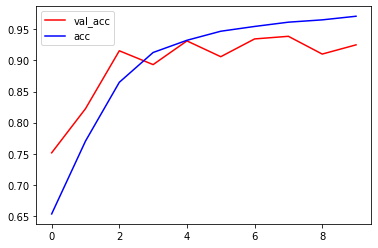

In [122]:
plt.plot(history.epoch, history.history.get('val_acc'), c='r', label='val_acc')
plt.plot(history.epoch, history.history.get('acc'), c='b', label='acc')
plt.legend()

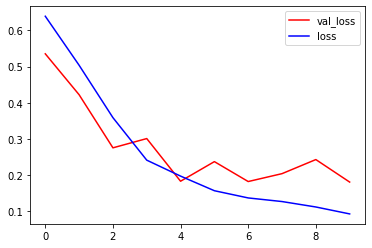

In [123]:
plt.plot(history.epoch, history.history.get('val_loss'), c='r', label='val_loss')
plt.plot(history.epoch, history.history.get('loss'), c='b', label='loss')
plt.legend()

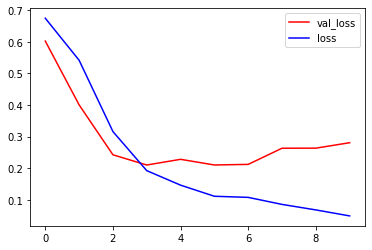

In [127]:
plt.plot(history.epoch, history.history.get('val_loss'), c='r', label='val_loss')
plt.plot(history.epoch, history.history.get('loss'), c='b', label='loss')
plt.legend()

# 使用雙向 RNN

In [78]:
def train_model():
    model = keras.Sequential()
    model.add(layers.Embedding(max_word, 16, input_length=maxlen))
    model.add(layers.Bidirectional(layers.LSTM(64,
                         dropout=0.2,
                         recurrent_dropout=0.5)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=['acc'])
    return model

In [79]:
model3 = train_model()

In [80]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, min_lr=0.00001)

In [81]:
history = model3.fit(data_ok, 
                     data.review.values, 
                     epochs=30, 
                     batch_size=128, 
                     validation_split=0.2,
                     callbacks=[learning_rate_reduction])

Train on 3780 samples, validate on 946 samples
Epoch 1/30
3780/3780 [==============================] - 9s 2ms/step - loss: 0.6723 - acc: 0.6241 - val_loss: 0.6143 - val_acc: 0.6998
Epoch 2/30
3780/3780 [==============================] - 4s 1ms/step - loss: 0.4755 - acc: 0.7907 - val_loss: 0.3641 - val_acc: 0.8340
Epoch 3/30
3780/3780 [==============================] - 5s 1ms/step - loss: 0.3558 - acc: 0.8571 - val_loss: 0.2826 - val_acc: 0.8795
Epoch 4/30
3780/3780 [==============================] - 5s 1ms/step - loss: 0.2713 - acc: 0.9026 - val_loss: 0.3160 - val_acc: 0.8742
Epoch 5/30
3780/3780 [==============================] - 5s 1ms/step - loss: 0.2132 - acc: 0.9204 - val_loss: 0.2819 - val_acc: 0.8943
Epoch 6/30
3780/3780 [==============================] - 6s 2ms/step - loss: 0.1874 - acc: 0.9352 - val_loss: 0.2496 - val_acc: 0.9080
Epoch 7/30
3780/3780 [==============================] - 8s 2ms/step - loss: 0.1731 - acc: 0.9426 - val_loss: 0.2343 - val_acc: 0.9091
Epoch 8/30
3780

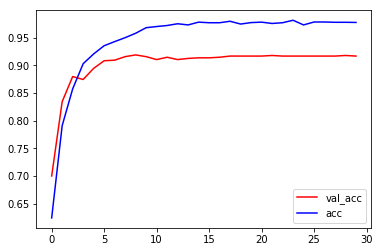

In [82]:
plt.plot(history.epoch, history.history.get('val_acc'), c='r', label='val_acc')
plt.plot(history.epoch, history.history.get('acc'), c='b', label='acc')
plt.legend()

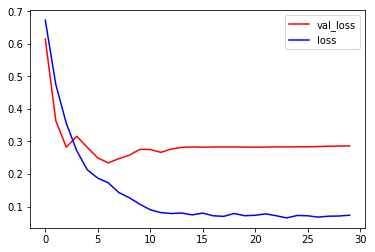

In [83]:
plt.plot(history.epoch, history.history.get('val_loss'), c='r', label='val_loss')
plt.plot(history.epoch, history.history.get('loss'), c='b', label='loss')
plt.legend()